# RuleTree for classification

## Initialize the RuleTreeClassifier and train it on your dataset

In [1]:
from ruletree.tree.RuleTreeClassifier import RuleTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data                # Features
y = data.target              # Target labels
feature_names = data.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [2]:
# Initialize the RuleTreeClassifier
# The `prune_useless_leaves` parameter allows pruning of leaves with the same prediction outcome.
rtc = RuleTreeClassifier(
    max_depth=3, 
    criterion='gini', 
    prune_useless_leaves=True, 
    random_state=42
)

# Fit the RuleTreeClassifier to the training data
rtc.fit(X_train, y_train)

# Extract the rules as a dictionary using feature names
rules = rtc.get_rules(columns_names=feature_names)


In [3]:
# Print textual rules of trained tree
rtc.print_rules(rules, columns_names=feature_names)

|--- mean concave points <= 0.051	398
|   |--- worst radius <= 16.83	245
|   |   |--- area error <= 48.7	230
|   |   |    output: 1
|   |   |--- area error > 48.7
|   |   |    output: 0
|   |--- worst radius > 16.83
|   |   |--- mean texture <= 16.19	15
|   |   |    output: 1
|   |   |--- mean texture > 16.19
|   |   |    output: 0
|--- mean concave points > 0.051
|   |--- worst texture <= 20.405	153
|   |   |--- worst radius <= 18.145	14
|   |   |    output: 1
|   |   |--- worst radius > 18.145
|   |   |    output: 0
|   |--- worst texture > 20.405
|   |   |--- worst area <= 718.65	139
|   |   |    output: 1
|   |   |--- worst area > 718.65
|   |   |    output: 0


In [6]:
y_pred = rtc.predict(X_test)
print('Prediction results\n', y_pred[0:10])

Prediction results
 [1 0 0 1 1 0 0 0 1 1]


In [7]:
y_pred_probas = rtc.predict_proba(X_test)
print('Prediction probabilities results\n', y_pred_probas[0:10])

Prediction probabilities results
 [[0.01321586 0.98678414]
 [1.         0.        ]
 [1.         0.        ]
 [0.01321586 0.98678414]
 [0.01321586 0.98678414]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.46153846 0.53846154]
 [0.01321586 0.98678414]]


In [10]:
print('Accuracy result\n', accuracy_score(y_test, y_pred))

Accuracy result
 0.9649122807017544


In [11]:
# Obtain global feature importances similar to sklearn feature_importances_ of a trained Tree
feture_importances = rtc.compute_feature_importances()
feture_importances

array([0.        , 0.02516887, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.77627009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01491592, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07719027, 0.0661448 , 0.        , 0.04031006, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

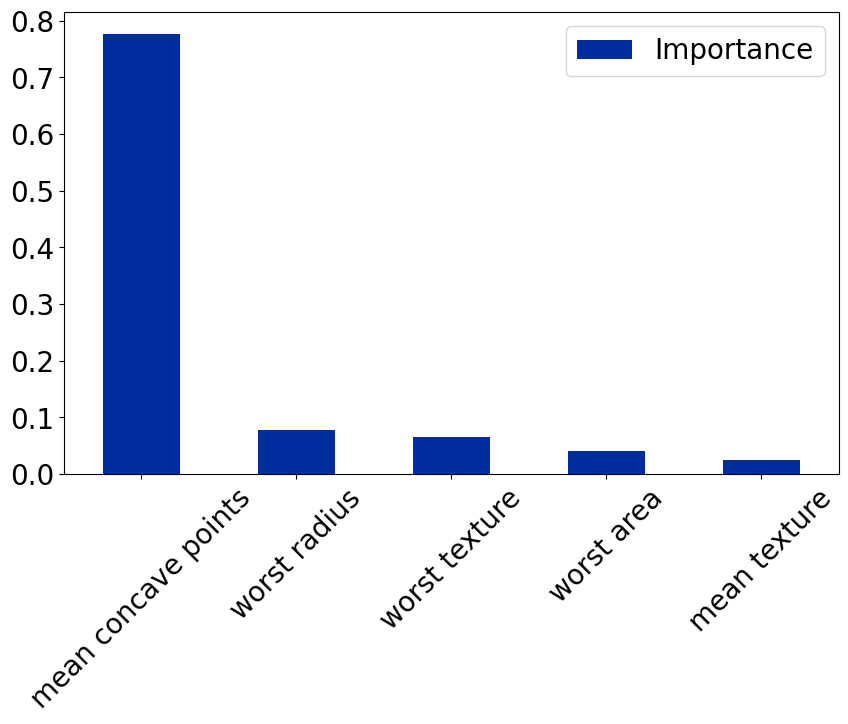

In [15]:
feat_importances = pd.DataFrame(feture_importances, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.head(5).plot(kind='bar', figsize=(10,6), color = '#002d9c')
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)                       
plt.legend(fontsize=20)  
plt.show()

In [16]:
# Get local feature importances similar to https://github.com/andosa/treeinterpreter implementation
# Prediction is the sum of bias and feature contributions
prediction, bias, contributions = rtc.local_interpretation(X_test, joint_contribution= True)

In [17]:
print('First instance analysis')
print(f'Prediction: {prediction[0]}')
print(f'Bias: {bias[0]}')
print(f'Contributions: {contributions[0]}')

First instance analysis
Prediction: [0.01321586 0.98678414]
Bias: [0.37437186 0.62562814]
Contributions: {(7,): array([-0.32131063,  0.32131063]), (7, 20): array([-0.03132209,  0.03132209]), (7, 13, 20): array([-0.00852327,  0.00852327])}
